In [19]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from functions import test_model
from IPython.display import Image

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

### Generate a dataframe with the accuracy scores for test and test2, i.e. data with door open and data with door closed

In [20]:
model_names = pd.read_csv('../models/scores.csv').sort_values(by='Accuracy', ascending=False).head(10)['Model name']
model_names

12      rf12
11      rf11
0        rf0
1        rf1
3        rf3
56    cart12
78     gbm12
14      rf14
77     gbm11
80     gbm14
Name: Model name, dtype: object

In [21]:
column_names = ['Model name', 'Accuracy Door Open', 'Accuracy Door Closed']
results_df = pd.DataFrame(columns=column_names)

for model_name in model_names.values:
    model, accuracy, accuracy2 = test_model(model_name)
    accuracy = np.round(accuracy*100, 2)
    accuracy2 = np.round(accuracy2*100, 2)
    results = [model_name, accuracy, accuracy2]
    new_row = {
        'Model name' : model_name,
        'Accuracy Door Open' : str(accuracy)+'%',
        'Accuracy Door Closed' : str(accuracy2)+'%'
    }
    results_df = results_df.append(new_row, ignore_index=True)
    print(model_name, model.best_params_)

rf12 {'max_depth': None, 'max_features': 'auto', 'n_estimators': 100}
rf11 {'max_depth': None, 'max_features': 'auto', 'n_estimators': 125}
rf0 {'max_depth': None, 'max_features': 'auto', 'n_estimators': 75}
rf1 {'max_depth': None, 'max_features': 'auto', 'n_estimators': 100}
rf3 {'max_depth': None, 'max_features': 'auto', 'n_estimators': 75}
cart12 {'max_depth': None, 'max_features': 'auto'}
gbm12 {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
rf14 {'max_depth': None, 'max_features': 'auto', 'n_estimators': 75}
gbm11 {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
gbm14 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [22]:
results_df

,Model name,Accuracy Door Open,Accuracy Door Closed
0,rf12,99.74%,99.87%
1,rf11,99.74%,99.86%
2,rf0,99.74%,99.85%
3,rf1,99.74%,99.85%
4,rf3,99.77%,99.79%
5,cart12,99.7%,99.88%
6,gbm12,99.66%,99.88%
7,rf14,99.74%,99.82%
8,gbm11,99.59%,99.87%
9,gbm14,99.7%,99.81%


In [23]:
results_df.to_csv('../models/results.csv', index=False)

### Model analysis - what predictions did we miss?

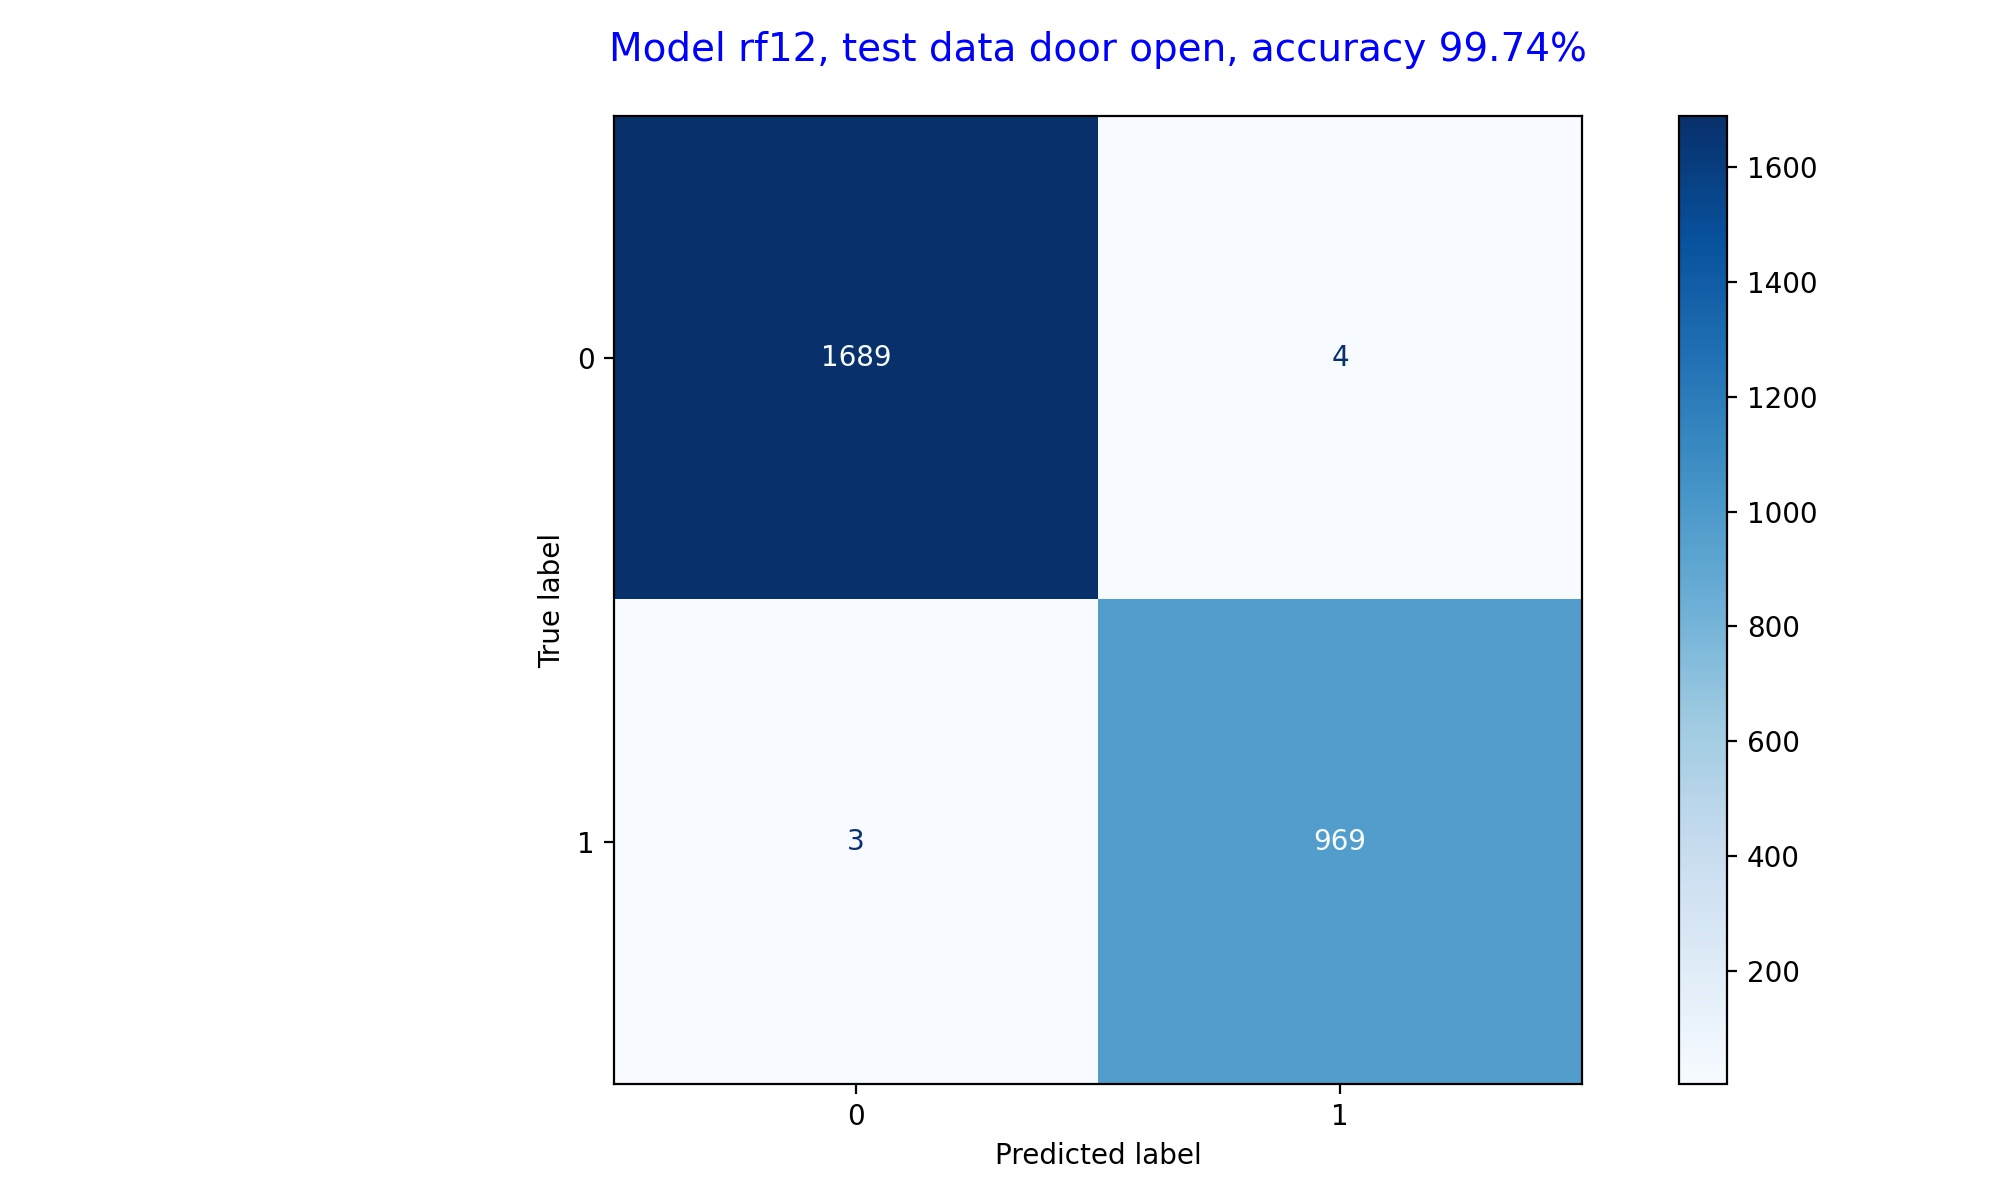

In [24]:
Image(filename='../images/conf_rf12_test.jpg', height=600, width=600)

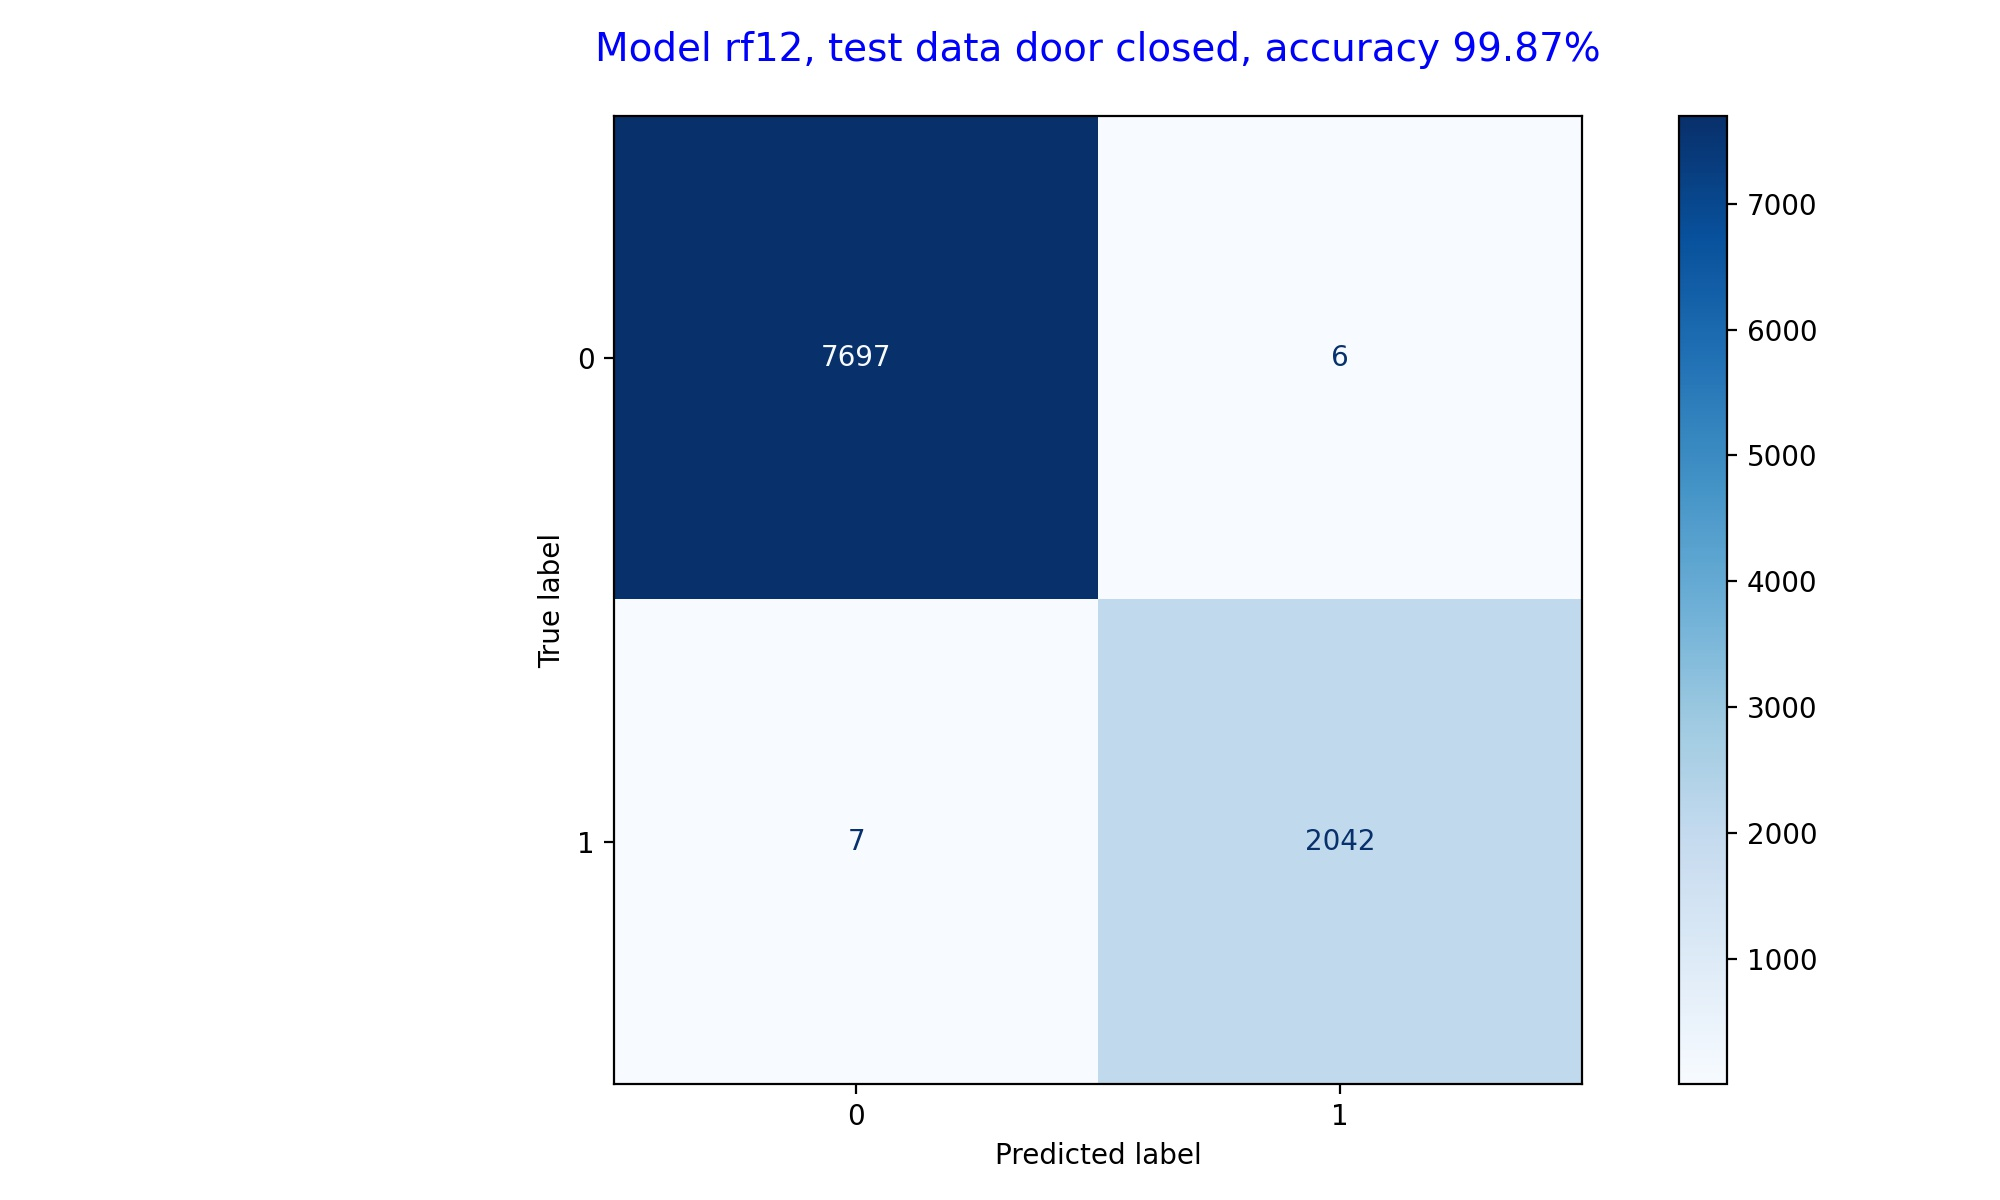

In [25]:
Image(filename='../images/conf_rf12_test2.jpg', height=600, width=600)

In [26]:
rf12_missed = pd.read_csv('../models/rf12_missed.csv')
rf12_missed

,date,temperature,humidity,light,co2,humidity_ratio,occupancy,weekday,predictions
0,2015-02-02 17:24:00,22.525,24.890000,426.000000,814.250000,0.004200,1,1,0
1,2015-02-02 17:34:00,22.600,25.066667,428.333333,849.333333,0.004250,0,1,1
2,2015-02-02 18:02:00,22.390,24.912000,418.600000,782.800000,0.004169,1,1,0
3,2015-02-03 07:43:00,20.310,23.200000,415.000000,470.800000,0.003414,1,1,0
4,2015-02-03 13:36:00,23.200,25.533333,634.000000,922.166667,0.004491,0,1,1
5,2015-02-03 13:37:00,23.200,25.500000,629.000000,899.000000,0.004485,0,1,1
6,2015-02-04 07:52:00,20.600,24.200000,399.500000,528.000000,0.003627,0,1,1


In [27]:
rf12_missed2 = pd.read_csv('../models/rf12_missed2.csv')
rf12_missed2

,date,temperature,humidity,light,co2,humidity_ratio,occupancy,weekday,predictions
0,2015-02-12 08:34:00,20.600000,22.200000,442.750000,681.750000,0.003325,0,1,1
1,2015-02-12 12:56:00,24.390000,23.392500,236.500000,852.500000,0.004419,1,1,0
2,2015-02-12 13:26:00,24.200000,23.745000,690.500000,729.000000,0.004435,0,1,1
3,2015-02-12 16:10:00,22.390000,26.000000,191.500000,534.500000,0.004353,1,1,0
4,2015-02-12 17:44:00,21.890000,27.890000,279.333333,603.666667,0.004530,1,1,0
5,2015-02-13 08:59:00,21.290000,25.463333,510.333333,528.666667,0.003984,0,1,1
6,2015-02-13 09:59:00,22.650000,24.897500,726.750000,585.000000,0.004234,0,1,1
7,2015-02-13 10:04:00,22.722500,25.047500,714.500000,613.000000,0.004278,0,1,1
8,2015-02-13 13:47:00,23.745000,25.972500,659.250000,567.500000,0.004722,1,1,0
9,2015-02-13 18:05:00,21.290000,32.790000,0.000000,577.000000,0.005139,1,1,0


In [28]:
rf11_missed = pd.read_csv('../models/rf11_missed.csv')
rf11_missed

,date,temperature,humidity,light,co2,humidity_ratio,occupancy,weekday,predictions
0,2015-02-02 17:24:00,22.525,24.890000,426.000000,814.250000,0.004200,1,1,0
1,2015-02-02 17:34:00,22.600,25.066667,428.333333,849.333333,0.004250,0,1,1
2,2015-02-02 18:02:00,22.390,24.912000,418.600000,782.800000,0.004169,1,1,0
3,2015-02-03 07:43:00,20.310,23.200000,415.000000,470.800000,0.003414,1,1,0
4,2015-02-03 13:36:00,23.200,25.533333,634.000000,922.166667,0.004491,0,1,1
5,2015-02-03 13:37:00,23.200,25.500000,629.000000,899.000000,0.004485,0,1,1
6,2015-02-04 08:33:00,20.956,25.390000,444.000000,717.800000,0.003891,0,1,1


In [29]:
rf11_missed2 = pd.read_csv('../models/rf11_missed2.csv')
rf11_missed2

,date,temperature,humidity,light,co2,humidity_ratio,occupancy,weekday,predictions
0,2015-02-12 08:34:00,20.600000,22.200000,442.750000,681.750000,0.003325,0,1,1
1,2015-02-12 12:56:00,24.390000,23.392500,236.500000,852.500000,0.004419,1,1,0
2,2015-02-12 13:26:00,24.200000,23.745000,690.500000,729.000000,0.004435,0,1,1
3,2015-02-12 16:10:00,22.390000,26.000000,191.500000,534.500000,0.004353,1,1,0
4,2015-02-12 17:44:00,21.890000,27.890000,279.333333,603.666667,0.004530,1,1,0
5,2015-02-13 08:59:00,21.290000,25.463333,510.333333,528.666667,0.003984,0,1,1
6,2015-02-13 09:59:00,22.650000,24.897500,726.750000,585.000000,0.004234,0,1,1
7,2015-02-13 10:04:00,22.722500,25.047500,714.500000,613.000000,0.004278,0,1,1
8,2015-02-13 13:47:00,23.745000,25.972500,659.250000,567.500000,0.004722,1,1,0
9,2015-02-13 18:05:00,21.290000,32.790000,0.000000,577.000000,0.005139,1,1,0
